In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import from sklearn library

from sklearn import datasets                            #for loading existing datasets in sklearn
from sklearn.linear_model import LinearRegression       #to build linear regression model
from sklearn.model_selection import train_test_split    #for calling test_train_split function
from sklearn.metrics import mean_squared_error          #for evaluating the performance of the model

In [2]:
data = pd.read_csv("boston_house_prices.csv")  #Load data

In [3]:
#calling a few functions
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [4]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [6]:
data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [8]:
data.tail(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [10]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [14]:
data.iloc[1] # prints the row

CRIM         0.02731
ZN           0.00000
INDUS        7.07000
CHAS         0.00000
NOX          0.46900
RM           6.42100
AGE         78.90000
DIS          4.96710
RAD          2.00000
TAX        242.00000
PTRATIO     17.80000
B          396.90000
LSTAT        9.14000
Price       21.60000
Name: 1, dtype: float64

In [15]:
data.iloc[:,1] # prints all rows of 1st column

0      18.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
501     0.0
502     0.0
503     0.0
504     0.0
505     0.0
Name: ZN, Length: 506, dtype: float64

In [16]:
data.iloc[2,1]

0.0

In [17]:
data.iloc[1:4,2:5]

,INDUS,CHAS,NOX
1,7.07,0,0.469
2,7.07,0,0.469
3,2.18,0,0.458


In [20]:
data.iloc[0:2,0:5]
# overfitting > model will perform well on test data, but will not perform well on test or unseen data

,CRIM,ZN,INDUS,CHAS,NOX
0,0.00632,18.0,2.31,0,0.538
1,0.02731,0.0,7.07,0,0.469


In [22]:
corr = data.corr() # building correlation matrix
print(corr)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

<Axes: >

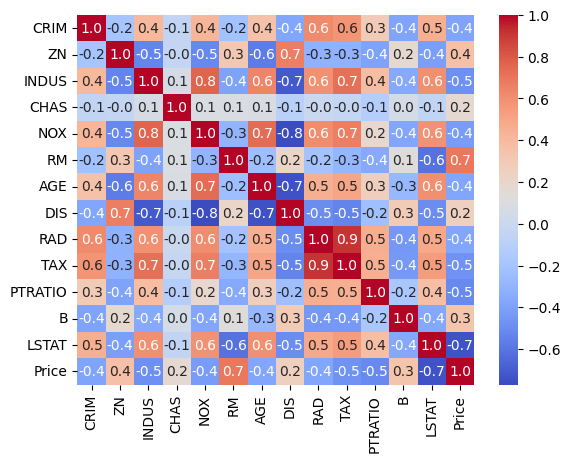

In [25]:
# generate the heat map of this corelation map
sns.heatmap(corr, annot=True, fmt='0.1f', cmap='coolwarm')
#which feature is strongly related with the target variable (price),
# in this case, RM = 0.7

In [26]:
x = data.RM
y = data.Price
print(x.shape)
print(y.shape)

(506,)
(506,)


In [27]:
x = np.array(x).reshape(-1,1) # conversion to
y = np.array(y).reshape(-1,1)
print(x.shape)
print(y.shape)

(506, 1)
(506, 1)


In [28]:
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x, y, test_size=0.2, random_state=5)

In [29]:
xtrain1.shape

(404, 1)

In [30]:
xtest1.shape

(102, 1)

In [31]:
ytrain1.shape

(404, 1)

In [32]:
ytest1.shape

(102, 1)

In [33]:
model1 = LinearRegression()
model1.fit(xtrain1,ytrain1)
ypred1 = model1.predict(xtrain1)

In [34]:
mse = mean_squared_error(ytrain1, ypred1) # ytrain1 is ground truth, and yperd1 is the predicted value

In [35]:
rmse = np.sqrt(mse)

In [36]:
r2 = model1.score(x,y)

In [37]:
print("Linear Regression Model - 1")
print("Feature Variables(s): RM")
print("Target Variable: Price")
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)
print("R-Squared: ", r2)

Linear Regression Model - 1
Feature Variables(s): RM
Target Variable: Price
Mean Squared Error:  48.612648648611334
Root Mean Squared Error:  6.972277149440585
R-Squared:  0.48299597838887476


**Task1:**
Make necessary changes in this code to compute MSE, RMSE and R-Sqaured on the test data

In [50]:
ypred_test = model1.predict(xtest1)

In [51]:
mse1 = mean_squared_error(ytest1, ypred_test)

In [52]:
rmse1 = np.sqrt(mse1)

In [53]:
r2_1 = model1.score(x,y)

In [55]:
print("Linear Regression Model - 1")
print("Feature Variables(s): RM")
print("Target Variable: Price")
print("Mean Squared Error: ", mse1)
print("Root Mean Squared Error: ", rmse1)
print("R-Squared: ", r2_1)

Linear Regression Model - 1
Feature Variables(s): RM
Target Variable: Price
Mean Squared Error:  23.970455527991305
Root Mean Squared Error:  4.895963186952216
R-Squared:  0.48299597838887476


**Task2:**
Build another linear regression model (call it model2) by using any other variable instead of RM. Compare its performance with model1.

In [49]:
x1 = data.AGE
x1 = np.array(x1).reshape(-1,1)
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(x1, y, test_size=0.2, random_state=5)
model2 = LinearRegression()
model2.fit(xtrain2,ytrain2)
ypred2 = model2.predict(xtest2)

In [57]:
mse2 = mean_squared_error(ytest2, ypred2)
rmse2 = np.sqrt(mse2)
r2_2 = model2.score(x1,y)

In [58]:
print("Linear Regression Model - 1")
print("Feature Variables(s): RM")
print("Target Variable: Price")
print("Mean Squared Error: ", mse2)
print("Root Mean Squared Error: ", rmse2)
print("R-Squared: ", r2_2)

Linear Regression Model - 1
Feature Variables(s): RM
Target Variable: Price
Mean Squared Error:  67.8462187008521
Root Mean Squared Error:  8.236881612652455
R-Squared:  0.14208693939799377


**Task3:** Build a linear regression model using 2-4 feature variables (call it model3). Explain why you included each variable in the model. Compare the performanc eof modle3 with model1 & model2
Task3 (Hint): x = data['RM','AGE']